INTRODUCTION
Everything used in this project is cited in README.md. Doing this made me realize how little do i know about programming language python and how much I can learn. Nevertheless i think this project represents my knowledge about webscraping at the moment, worth saying that it improved alot since I started this project.


In this file I will quickly summarize the code found in gold_prices.py, inflation_data.py and US_dollar_per_year.py and lead the reader through the findings of the project. Firstly i decided on the topic I wanted to present. Later on I figured out that it might be better to find tables on the web and adjusting my topic to it, but I already made too much progress to change the topic. Always wondering about things influencing inflation and consequences of it brought me to the websites about it. I captured the data as seen in other files. Not every table could be captured the same way and searching the web gave me some ideas about scraping and sorting the data. In the end I decided to sort all of the data in JSON file. This turned out to be a good decision, since the data is now very transparent.

I started with inflation_data.py, firstly i fetched the data and saw that opening url did not work as I wanted, because it does not show the table but only downloads folder, in which are 3 different csv files. Since I only needed one, i decided to solve this with zipfile library, which saved a zip file. After extracting it, I then proceeded with processing the csv file and sorting the data in it in JSON file.

The most simple one was US_dollar_per_year.py which had ASCII format on the page. This made everything much easier, after fetching data, all I had to do is sort the document to create a JSON file.

The last one was gold_prices.py where I had to refresh my knowledge about html. I had to parse the html code of the webpage to find the table that I wanted, after that I made the same thing as I did previous two times. I sorted and stored the data in JSON dictionary.

In this file I will be presenting: 
1. average world inflation throughout the years, with red dashed lines marked on years where inflation in the world was the highest.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


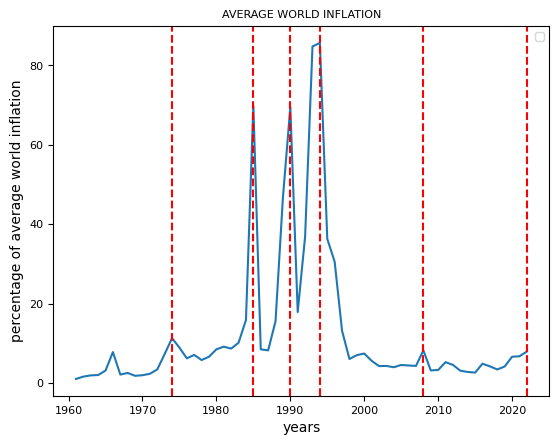

In [11]:
import matplotlib.pyplot as plt
from data.countries import countries
import json
import os


# function that avoids doing mathematical operations on strings
def cast_to_float(s):
    """
    Function that takes a string as an input and converts it into a float
    """
    return 0 if s == '' else float(s)


def inflation_data_function():
    notebook_dir = os.path.dirname(os.path.abspath("__file__"))
    relative_path = 'data/inflation.json'
    inflation_file_path = os.path.join(notebook_dir, relative_path)
    with open(inflation_file_path, "r") as inflation_file:
        inflation_data = json.load(inflation_file)



# calculating the sum of world inflation per year
def yearly_inflation():
    country_counter = 0
    average_world_inflation = {}
    for country, year_inflation_dict in inflation_data.items():
        if country in countries:
            country_counter += 1
            for year, inflation in year_inflation_dict.items():
                if year in average_world_inflation:
                    average_world_inflation[year] = average_world_inflation[year] + cast_to_float(inflation_data[country][year])
                else:
                    average_world_inflation[year] = cast_to_float(inflation_data[country][year])
    return average_world_inflation



inflation_x, inflation_y = [], []
printing_x, printing_y = [], []

average_world_inflation = yearly_inflation()
for year, inflation in average_world_inflation.items():
    average_world_inflation[year] = average_world_inflation[year] / 194 # number of all the countries
    inflation_x.append(int(year))
    inflation_y.append(average_world_inflation[year])


plt.plot(inflation_x, inflation_y)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.legend(loc='upper right')            # legend location 
plt.xlabel('years')                      # x - label name
plt.ylabel('percentage of average world inflation')                     # y - label name
plt.title('AVERAGE WORLD INFLATION')                                    # graph title
plt.axvline(x=2008, color='red', linestyle='--', label='Year 2008')     # location of the red dashed line
plt.axvline(x=1994, color='red', linestyle='--', label='Year 1994')
plt.axvline(x=1974, color='red', linestyle='--', label='Year 1974')
plt.axvline(x=1985, color='red', linestyle='--', label='Year 1985')
plt.axvline(x=1990, color='red', linestyle='--', label='Year 1990')
plt.axvline(x=2022, color='red', linestyle='--', label='Year 2022')


plt.show()


2. Relation between money printed and global inflation. As it is seen on the graph these two things are expectedly extremely corelated.

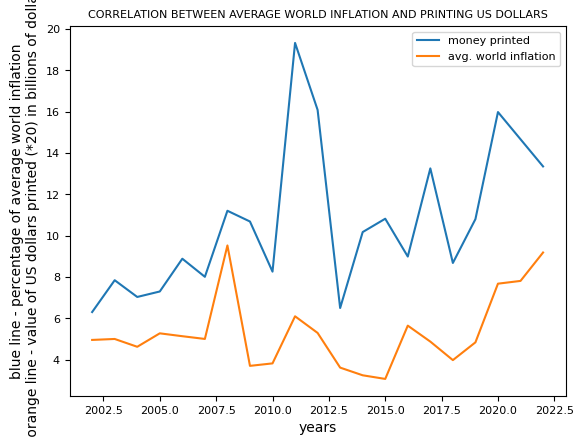

In [12]:

import matplotlib.pyplot as plt
from data.countries import countries
import json


inflation_data_function()

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
relative_path = 'data/US_dollar_per_year.json'
money_printed_path = os.path.join(notebook_dir, relative_path)
with open(money_printed_path, "r") as money_printed_file:
    money_printed_data = json.load(money_printed_file)


country_counter = 0
average_world_inflation = {}


# Take the sum of inflation rate for each year from 2002 to 2020

for country, year_inflation_dict in inflation_data.items():
    if country in countries:
        country_counter += 1
        for year, inflation in year_inflation_dict.items():
            if int(year) >= 2002:
                if year in average_world_inflation:
                    average_world_inflation[year] = average_world_inflation[year] + cast_to_float(inflation_data[country][year])
                else:
                    average_world_inflation[year] = cast_to_float(inflation_data[country][year])



inflation_x, inflation_y = [], []
printing_x, printing_y = [], []


# Calculate average and separate data for plot
for year, inflation in average_world_inflation.items():
    average_world_inflation[year] = average_world_inflation[year] / country_counter
    inflation_x.append(int(year))
    inflation_y.append(average_world_inflation[year])


#what i wanted on x an y axis for printing data
for year, printing_dict in money_printed_data.items():
    printing_x.append(int(year))
    printing_y.append(float(printing_dict["value"][1:]) / 20)


#making a plot
plt.plot(printing_x, printing_y, label="money printed")
plt.plot(inflation_x, inflation_y, label="avg. world inflation") 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  
plt.legend(loc='upper right')
plt.xlabel('years')
plt.ylabel('blue line - percentage of average world inflation\n orange line - value of US dollars printed (*20) in billions of dollars')
plt.title('CORRELATION BETWEEN AVERAGE WORLD INFLATION AND PRINTING US DOLLARS') 
plt.show()
    
    
        

3. Relation between gold prices and average world inflation. while at the first glance it seems that there is no connections between those two. When you take a better look at it, you can see that they are still related.

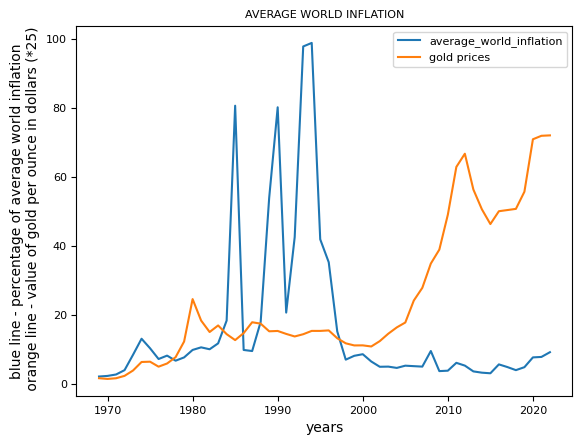

In [13]:
import matplotlib.pyplot as plt
from data.countries import countries
import json

inflation_data_function()

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
relative_path = 'data/gold_prices.json'
gold_prices_path = os.path.join(notebook_dir, relative_path)
with open(gold_prices_path, "r") as gold_prices_file:
    gold_prices_data = json.load(gold_prices_file)

country_counter = 0
average_world_inflation = {}


#CALCULATING THE WORLD AVERAGE INFLATION BY YEAR
for country, year_inflation_dict in inflation_data.items():
    if country in countries:
        country_counter += 1
        for year, inflation in year_inflation_dict.items():
            if int(year) >= 1969:
                if year in average_world_inflation:
                    average_world_inflation[year] = average_world_inflation[year] + cast_to_float(inflation_data[country][year])
                else:
                    average_world_inflation[year] = cast_to_float(inflation_data[country][year])


inflation_x, inflation_y = [], []
gold_prices_x, gold_prices_y = [], []


for year, inflation in average_world_inflation.items():
    average_world_inflation[year] = average_world_inflation[year] / country_counter
    inflation_x.append(int(year))
    inflation_y.append(average_world_inflation[year])


#since gold prices are presented as '$thousands,hundreds tens ones.decimal' i have to get rid of commas
def change_gold_price(value):
    if ',' in value:
        value = value.replace(',', '')
    return value


#loop which will get the data i need for the graph
for year, value_change_dict in gold_prices_data.items():
    gold_prices_x.append(int(year))
    gold_prices_y.append(float(change_gold_price(value_change_dict["Average closing price"][1:])) / 25)



plt.plot(inflation_x, inflation_y, label='average_world_inflation')
plt.plot(gold_prices_x, gold_prices_y, label="gold prices")
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  
plt.legend(loc='upper right')             
plt.xlabel('years')                      
plt.ylabel('blue line - percentage of average world inflation\n orange line - value of gold per ounce in dollars (*25)')                     
plt.title('AVERAGE WORLD INFLATION')                                    


plt.show()
